# Team 20 
# Customer Personality Aanalysis

## Introduction
We are going to use Customer Personality Analysis data set (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) which contains data of a company’s customers. 
We will analyze this data set, get insights that help marketting team to conduct better marketing strategies as customizing campains for certain customer groups or clusters. 

### Question
How many groups shuld we divide the customers into? and What marketing recommendations for each group?

### Assumptions are:
1. **'Graduation'** is the same as **'Bachelor'**
2. **'2n Cycle'** is the same as **'Master'**
3. **'Income'** more than 125K is an outlier
4. **'Age'**: more than 100 years to be ignored

In [5]:
# Python 3.12.3 was used to compile this file.

# Importing Required Libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import csv

file_path = r'C:\Users\Administrator\Downloads\DSIProject\cpa.tsv' 
# Read the dataset and store it in alist called 'data'
# Open the TSV file and read its contents
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file, delimiter='\t')
    data = list(reader)  # Store the data in a list

# Converting the list 'data' to Pandas DataFrame called 'df'
df = pd.DataFrame(data[1:], columns=data[0])

# Convert 'Income' column to numeric, handling errors
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Get information on the dataframe and it's columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   object 
 1   Year_Birth           2240 non-null   object 
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   object 
 6   Teenhome             2240 non-null   object 
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   object 
 9   MntWines             2240 non-null   object 
 10  MntFruits            2240 non-null   object 
 11  MntMeatProducts      2240 non-null   object 
 12  MntFishProducts      2240 non-null   object 
 13  MntSweetProducts     2240 non-null   object 
 14  MntGoldProds         2240 non-null   object 
 15  NumDealsPurchases    2240 non-null   o

In [7]:
# Getting Description on each coloumn and that is:
    # Getting count of values 
    # Getting Mean, standard Deviation, Minimumm, 25% , 50%, 75%, and maximum value
df.describe().T   # T: means transpose 

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0


## Data Exploring, Cleansing & Manipulation

#### Cleansing **'Income'** values

In [8]:
# Cleansing 'Income' values

# find out how many 'Income' values is NA
print('Number of NA values in Income Before cleansing is : ', df['Income'].isna().sum())

# Filter out rows where 'Income' is NA by using .loc and boolean indexing for rows then Dropping those rows from the data frame 'df'. 
df = df.loc[df['Income'].notna()]

print("NA values from 'Income' Removed Completley")

Number of NA values in Income Before cleansing is :  24
NA values from 'Income' Removed Completley


In [9]:
# Reseting the index to correct index errors after dropping some rows
df.reset_index(drop=True, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   object 
 1   Year_Birth           2216 non-null   object 
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   object 
 6   Teenhome             2216 non-null   object 
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   object 
 9   MntWines             2216 non-null   object 
 10  MntFruits            2216 non-null   object 
 11  MntMeatProducts      2216 non-null   object 
 12  MntFishProducts      2216 non-null   object 
 13  MntSweetProducts     2216 non-null   object 
 14  MntGoldProds         2216 non-null   object 
 15  NumDealsPurchases    2216 non-null   o

#### Checking for **duplicate values** and dropping them if any

In [10]:
# Check if there are duplicated values using duplicate() and use sum() function to count how many.
duplicates = df.duplicated().sum()
print('Number of Duplicates in the dataset is: ', duplicates)

Number of Duplicates in the dataset is:  0


##### **Marital_Status** values Cleansing and Manipulation
1. Dropping 'Absurd' and 'YOLO' values
2. Replace 'Alone' by 'Single'
3. Replace 'Together' by 'Married'

No of Absurd =  0
No of YOLO =  0
The categories in the Marital Status are:  ['Single' 'Married' 'Divorced' 'Widow']


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_26040\358334751.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


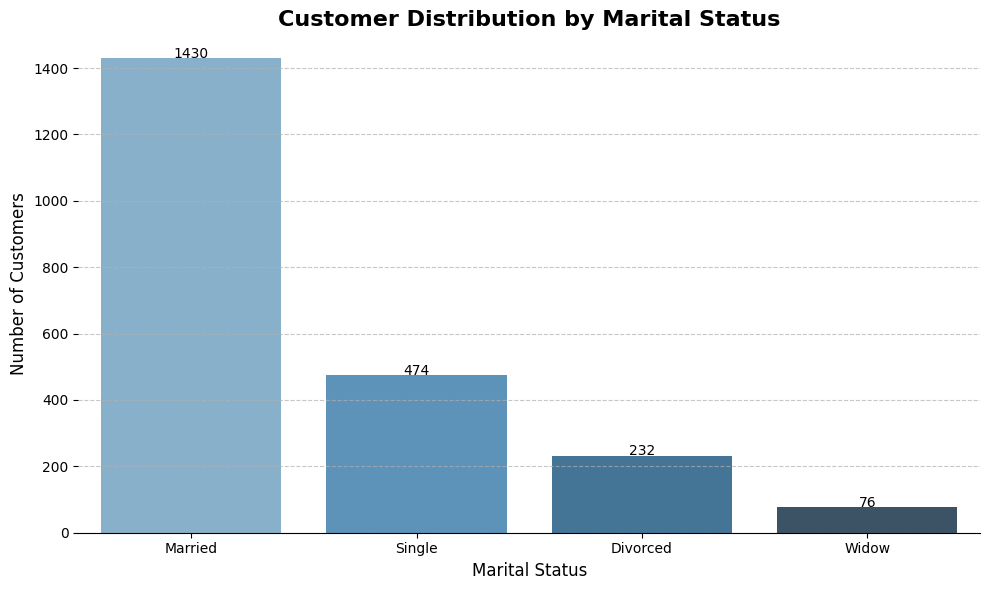

In [11]:
# Marital_Status Column cleansing:
    # 1. Dropping 'Absurd' and  'YOLO'
    # 2. Replace 'Alone' by 'Single'
    # 3. Replace 'Together' by 'Married' 

# Dropping the rows that has Marital_Status == 'Absurd'
df = df[df['Marital_Status'] != 'Absurd']

# Dropping the rows that has Marital_Status == 'YOLO'
df = df[df['Marital_Status'] != 'YOLO']

# Making Sure All Rows where Marital_Status = 'Absurd'
print('No of Absurd = ',df[df['Marital_Status'] == 'Absurd']['Marital_Status'].count())

# Making Sure All Rows where Marital_Status = 'YOLO' 
print('No of YOLO = ',df[df['Marital_Status'] == 'YOLO']['Marital_Status'].count())

# Revise the Marital_status
df['Marital_Status_revised'] = df['Marital_Status'].replace({
    'Alone': 'Single',    # Replace 'Alone' by 'Single'
    'Together': 'Married' # Replace 'Together' by 'Married'
    })

print('The categories in the Marital Status are: ', df['Marital_Status_revised'].unique())

# Saving the revised marital status in 'Marital_status'
df['Marital_Status']=df['Marital_Status_revised']

# Dropping Marital_Status_revised
df=df.drop(columns=['Marital_Status_revised'])

# Count the number of customers in each Marital Status category
marital_status_counts = df['Marital_Status'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=marital_status_counts.index, 
    y=marital_status_counts.values, 
    palette='Blues_d'  # Use a corporate-style blue palette
)

# Add labels and title
plt.title('Customer Distribution by Marital Status', fontsize=16, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add value annotations above bars
for i, value in enumerate(marital_status_counts.values):
    plt.text(
        i, 
        value + 1,  # Position above the bar
        str(value), 
        ha='center', 
        fontsize=10, 
        color='black'
    )

# Customize grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True)  # Remove the left spine for a cleaner look
plt.tight_layout()

# Show the chart
plt.show()

In [12]:
# Reseting the index to correct index errors after dropping column 'Marital_Status_revised'
df.reset_index(drop=True, inplace=True)

#### **Education** values Cleansing and Manipulation
1. Replace 'Graduation' by 'Bachelor'
2. Replace '2n Cycle' by 'Master'

The categories in the Education are:  ['Bachelor' 'PhD' 'Master' 'Basic']


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_26040\4176562989.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


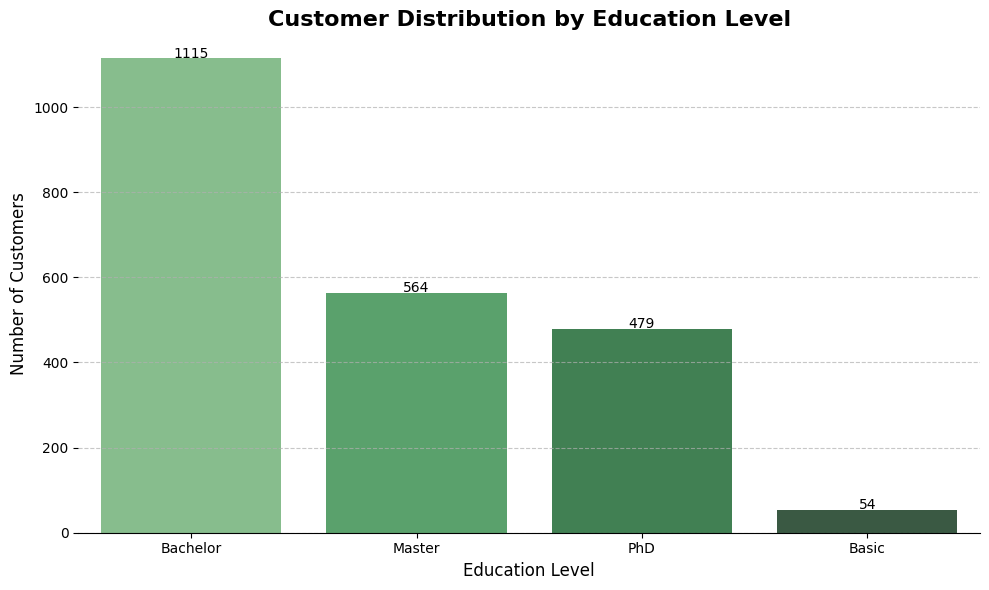

In [13]:
# Education Column cleansing:
    # 1. Replace 'Graduation' by 'Bachelor'
    # 2. Replace '2n Cycle' by 'Master'

# Replace 'Graduation' by 'Bachelor', and '2n Cycle' by 'Master'
df['Education_revised'] = df['Education'].replace({
    'Graduation': 'Bachelor',
    '2n Cycle': 'Master'
})
print('The categories in the Education are: ',df['Education_revised'].unique())

# Saving the revised Education in 'Education'
df['Education']=df['Education_revised']

# Dropping the revised Edication column
df=df.drop(columns=['Education_revised'])

# Count the number of customers in each Education category
education_counts = df['Education'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=education_counts.index, 
    y=education_counts.values, 
    palette='Greens_d'  # Use a professional green color palette
)

# Add labels and title
plt.title('Customer Distribution by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add value annotations above bars
for i, value in enumerate(education_counts.values):
    plt.text(
        i, 
        value + 1,  # Position above the bar
        str(value), 
        ha='center', 
        fontsize=10, 
        color='black'
    )

# Customize grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True)  # Remove left spine for a cleaner look
plt.tight_layout()

# Show the chart
plt.show()


#### **Adding** a New Column called **'Age' ( Age of customer)** AND **Dropping** any row with customer over 100 years old

Number of persons with Age more than 100 years Before Removing them from our Data is:  3
Number of persons with Age more than 100 years After Removing them from our Data is:  0


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_26040\817028093.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


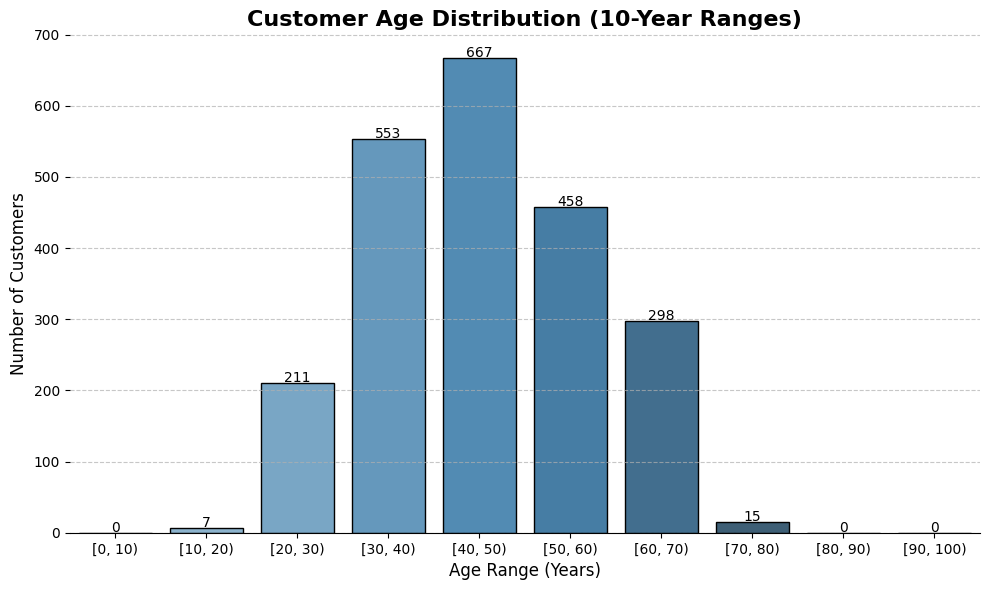

In [14]:
# Adding a new column called 'Age'

df['Age'] = 2014 - df['Year_Birth'].astype(int)   # 2014 was the latest year in the dataset

# Finding how many persons with age more than 100 years old
print('Number of persons with Age more than 100 years Before Removing them from our Data is: ', (df[df['Age'] >= 100]['Age'].count()))    # we found 3 persons with Age > 100 years old

# Remove people with age > 100 years
df = df[df['Age'] <= 100]


# Reseting the index to correct index errors after dropping and removing some data
df.reset_index(drop=True, inplace=True)

print('Number of persons with Age more than 100 years After Removing them from our Data is: ', (df[df['Age'] >= 100]['Age'].count()))

# Group ages into 10-year bins and count frequencies
age_bins = pd.cut(df['Age'], bins=range(0, 101, 10), right=False)
age_counts = age_bins.value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Larger figure for clarity
sns.barplot(
    x=age_counts.index.astype(str),  # Convert bin ranges to string for display
    y=age_counts.values,
    palette='Blues_d',  # Professional blue palette
    edgecolor='black'
)

# Add labels and title
plt.title('Customer Age Distribution (10-Year Ranges)', fontsize=16, fontweight='bold')
plt.xlabel('Age Range (Years)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add value annotations on each bar
for i, value in enumerate(age_counts.values):
    plt.text(
        i, 
        value + 1,  # Position above the bar
        str(value), 
        ha='center', 
        fontsize=10, 
        color='black'
    )

# Customize the grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True)  # Cleaner look by removing left spine
plt.tight_layout()

# Show the plot
plt.show()


#### Visualizing the **'Income'** values

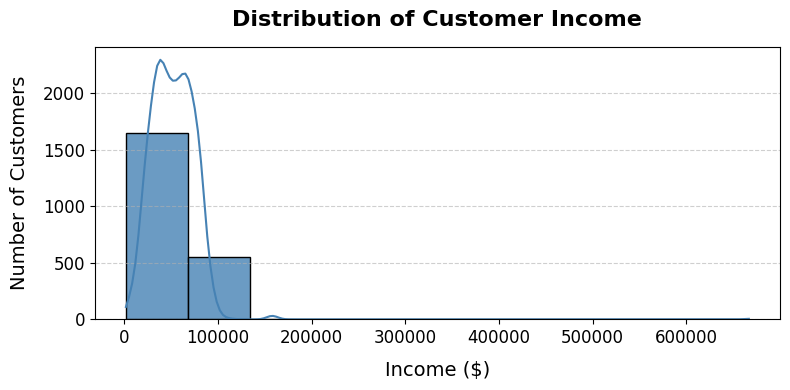

In [15]:
# Updated Income Distribution Visualization
plt.figure(figsize=(8, 4))  # Adjust figure size for better clarity

# Use seaborn for a polished histogram
sns.histplot(data=df, x='Income', bins=10, kde=True, color='steelblue', edgecolor='black', alpha=0.8)

# Customize the title and labels
plt.title('Distribution of Customer Income', fontsize=16, weight='bold', pad=15)
plt.xlabel('Income ($)', fontsize=14, labelpad=10)
plt.ylabel('Number of Customers', fontsize=14, labelpad=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Set the tick parameters for a cleaner look
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


#### We have ***outlier*** in the Income  ***coloumn*** So, We are going to remove outliers (assumption **'Income'** more than 125K is an outlier)

Number of persons with > 100K INCOME is :  13
Number of persons with > 125K INCOME is :  8
Number of persons with > 150K INCOME is :  8
Number of persons with > 125K INCOME After Dropping Values > 125K is :  0


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_26040\3667405246.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


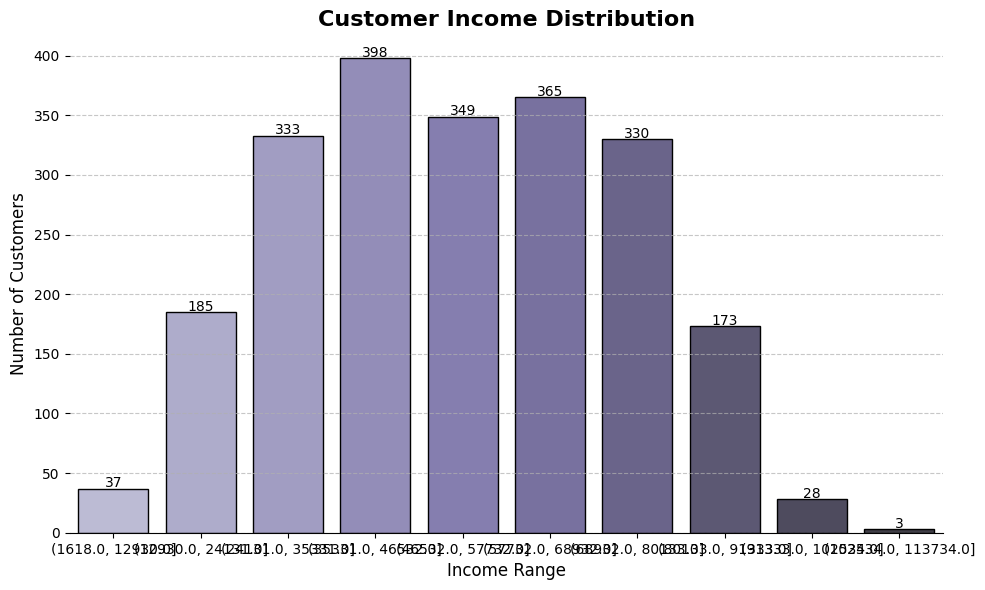

In [16]:
# To Remove the outliers we need to explore how many Values are more than 100K and 125K and 100K for the INCOME
# Displaying the how many INCOME values that are more than 100K, 125K & 150 K 
print('Number of persons with > 100K INCOME is : ', df[df['Income'] >=100000]['Income'].count())
print('Number of persons with > 125K INCOME is : ', df[df['Income'] >=125000]['Income'].count())
print('Number of persons with > 150K INCOME is : ', df[df['Income'] >=150000]['Income'].count())

# Updating the INCOME column by dropping rows when Income >= 125,000
df = df[df['Income'] <= 125000]

# Reseting the index to correct index errors after manuplating some data
df.reset_index(drop=True, inplace=True)

# Making sure there is no Income more than 125,000
print('Number of persons with > 125K INCOME After Dropping Values > 125K is : ', df[df['Income'] >=125000]['Income'].count())

# Define income bins for grouping
income_bins = pd.cut(df['Income'], bins=10, precision=0)
income_counts = income_bins.value_counts().sort_index()

# Create a bar chart for income distribution
plt.figure(figsize=(10, 6))  # Larger figure for better readability
sns.barplot(
    x=income_counts.index.astype(str),  # Convert bin labels to strings
    y=income_counts.values,
    palette='Purples_d',  # Professional purple color palette
    edgecolor='black'
)

# Add labels and title
plt.title('Customer Income Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Income Range', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add value annotations on each bar
for i, value in enumerate(income_counts.values):
    plt.text(
        i, 
        value + 1,  # Position above the bar
        str(value), 
        ha='center', 
        fontsize=10, 
        color='black'
    )

# Customize the grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True)  # Remove left spine for a cleaner look
plt.tight_layout()

# Show the plot
plt.show()


#### Dropping 2 columns: **'Z_CostContact'** & **'Z_Revenue'**   because they do not add value to the data, 'Z_CostContact'=3 always, 'Z_Revenue'=11 always.

In [17]:
# Dropping 2 columns: 'Z_CostContact'   &    'Z_Revenue'
    # Reason for Droping 'Z_CostContact' is that column has always a value of 3  
    # Reason for Droping 'Z_Revenue' is that column has always a value of 11  

df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])
print(" Z_CostContact Coloumn Removed")
print(" Z_Revenue Coloumn Removed")
df.head(5)

 Z_CostContact Coloumn Removed
 Z_Revenue Coloumn Removed


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Bachelor,Single,58138.0,0,0,04-09-12,58,635,...,4,7,0,0,0,0,0,0,1,57
1,2174,1954,Bachelor,Single,46344.0,1,1,08-03-14,38,11,...,2,5,0,0,0,0,0,0,0,60
2,4141,1965,Bachelor,Married,71613.0,0,0,21-08-13,26,426,...,10,4,0,0,0,0,0,0,0,49
3,6182,1984,Bachelor,Married,26646.0,1,0,10-02-14,26,11,...,4,6,0,0,0,0,0,0,0,30
4,5324,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,...,6,5,0,0,0,0,0,0,0,33


#### Changing the format of 'Dt_Customer' to ease calculations

In [18]:
# Change the date format
# Convert 'Dt_Customer' to datetime to help in calculations related to date  
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_26040\206559480.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


#### Add a column called **'Since_Years'** to the data frame  to show how many years has been a customer and Dropping 'Dt_Customer'

In [19]:
# Add a colum called 'Since_Years' to the data frame  to show how many years has been a customer
df['Since_Years'] = 2014 - df['Dt_Customer'].dt.year

# Dropping Dt_Customer coloumn since it is not needed after creating Since_Year coloumn
df=df.drop(columns=['Dt_Customer'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Since_Years
0,5524,1957,Bachelor,Single,58138.0,0,0,58,635,88,...,7,0,0,0,0,0,0,1,57,2
1,2174,1954,Bachelor,Single,46344.0,1,1,38,11,1,...,5,0,0,0,0,0,0,0,60,0
2,4141,1965,Bachelor,Married,71613.0,0,0,26,426,49,...,4,0,0,0,0,0,0,0,49,1
3,6182,1984,Bachelor,Married,26646.0,1,0,26,11,4,...,6,0,0,0,0,0,0,0,30,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,5,0,0,0,0,0,0,0,33,0


#### Add a column called **'Total Number Purchases'** to the data frame  to show how many number of purchases customer done

In [20]:
# Creating a new column in the df called 'Total Number Purchases' = 'NumWebPurchases' + 'NumStorePurchases' + 'NumStorePurchases'
df['Total Number Purchases'] = df['NumWebPurchases'].astype(int) + df['NumStorePurchases'].astype(int) + df['NumCatalogPurchases'].astype(int)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Since_Years,Total Number Purchases
0,5524,1957,Bachelor,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,1,57,2,22
1,2174,1954,Bachelor,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,0,60,0,4
2,4141,1965,Bachelor,Married,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,0,49,1,20
3,6182,1984,Bachelor,Married,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,0,30,0,6
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,0,33,0,14


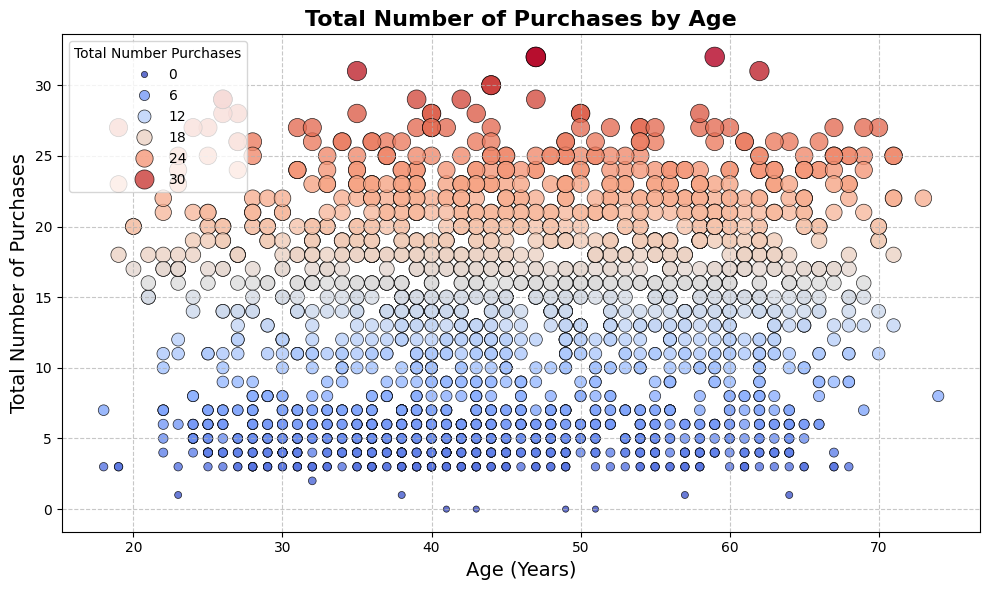

In [21]:
# Scatter plot for Total Number of Purchases by Age
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=df['Age'], 
    y=df['Total Number Purchases'], 
    hue=df['Total Number Purchases'],  # Optional: Color scale by purchase count
    size=df['Total Number Purchases'],  # Optional: Size markers by purchases
    sizes=(20, 200), 
    palette='coolwarm', 
    alpha=0.8,
    edgecolor='black'
)

# Add titles and labels
plt.title('Total Number of Purchases by Age', fontsize=16, fontweight='bold')
plt.xlabel('Age (Years)', fontsize=14)
plt.ylabel('Total Number of Purchases', fontsize=14)

# Add a grid for readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_26040\2079137046.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_purchases = df.groupby('Age Group')['Total Number Purchases'].sum()
C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_26040\2079137046.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


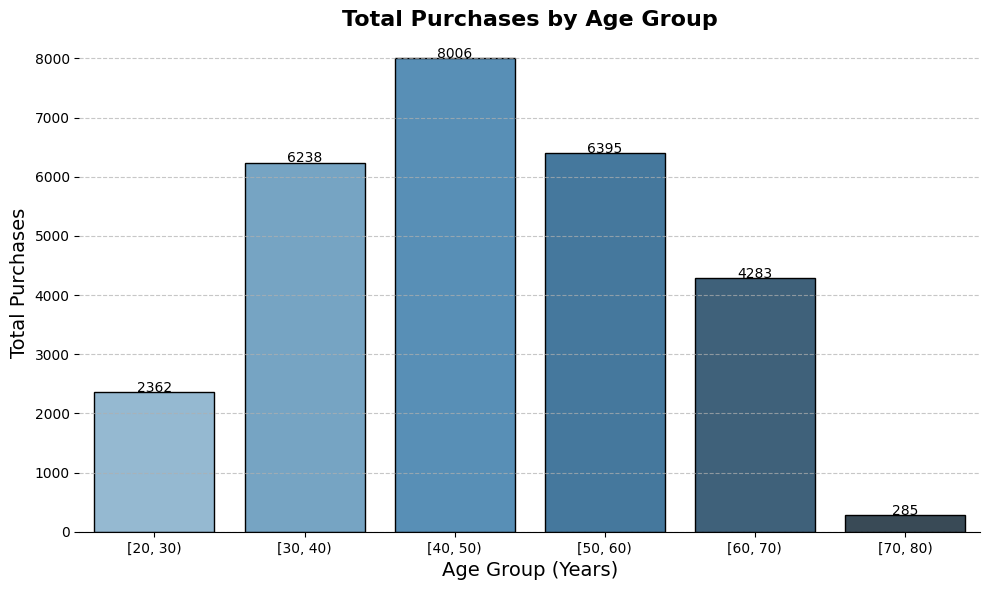

In [22]:
# Aggregate data by age groups for better visualization
df['Age Group'] = pd.cut(df['Age'], bins=range(20, 81, 10), right=False)
age_group_purchases = df.groupby('Age Group')['Total Number Purchases'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))

sns.barplot(
    x=age_group_purchases.index.astype(str),  # Convert age group to string for labels
    y=age_group_purchases.values,
    palette='Blues_d',  # Use a professional blue palette
    edgecolor='black'
)

# Add titles and labels
plt.title('Total Purchases by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group (Years)', fontsize=14)
plt.ylabel('Total Purchases', fontsize=14)

# Annotate values on each bar
for i, value in enumerate(age_group_purchases.values):
    plt.text(
        i, 
        value + 5,  # Position above the bar
        f'{value}',  # Display the value
        ha='center', 
        fontsize=10, 
        color='black'
    )

# Customize grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True)  # Remove the left spine for a cleaner look
plt.tight_layout()

# Show the plot
plt.show()


#### Add a column called **'Total Amount Purchases'** to the data frame  to show how much in Dollars value the customer done purchases.

In [23]:
# Creating a new column in the df called 'Total Amount Purchases' = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']
df['Total Amount Purchases'] = df['MntWines'].astype(int) + df['MntFruits'].astype(int) + df['MntMeatProducts'].astype(int)+ df['MntFishProducts'].astype(int)+ df['MntSweetProducts'].astype(int)+ df['MntGoldProds'].astype(int)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Since_Years,Total Number Purchases,Age Group,Total Amount Purchases
0,5524,1957,Bachelor,Single,58138.0,0,0,58,635,88,...,0,0,0,0,1,57,2,22,"[50, 60)",1617
1,2174,1954,Bachelor,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,60,0,4,"[60, 70)",27
2,4141,1965,Bachelor,Married,71613.0,0,0,26,426,49,...,0,0,0,0,0,49,1,20,"[40, 50)",776
3,6182,1984,Bachelor,Married,26646.0,1,0,26,11,4,...,0,0,0,0,0,30,0,6,"[30, 40)",53
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,33,0,14,"[30, 40)",422


#### Add a column called **'No of Accepted Campains'** to the data frame  to show how many campains or promotions the customer accepted.

In [24]:
#Creating a feature to get a sum of accepted promotions 
df["No of Accepted Campains"] = df["AcceptedCmp1"].astype(int)+ df["AcceptedCmp2"].astype(int)+ df["AcceptedCmp3"].astype(int)+ df["AcceptedCmp4"].astype(int)+ df["AcceptedCmp5"].astype(int)
df.tail(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Since_Years,Total Number Purchases,Age Group,Total Amount Purchases,No of Accepted Campains
2196,10870,1967,Bachelor,Married,61223.0,0,1,46,709,43,...,0,0,0,0,47,1,16,"[40, 50)",1341,0
2197,4001,1946,PhD,Married,64014.0,2,1,56,406,0,...,1,0,0,0,68,0,15,"[60, 70)",444,1
2198,7270,1981,Bachelor,Divorced,56981.0,0,0,91,908,48,...,0,0,0,0,33,0,18,"[30, 40)",1241,1
2199,8235,1956,Master,Married,69245.0,0,1,8,428,30,...,0,0,0,0,58,0,21,"[50, 60)",843,0
2200,9405,1954,PhD,Married,52869.0,1,1,40,84,3,...,0,0,0,1,60,2,8,"[60, 70)",172,0


#### Adding a column called **'Family_Size'** to the data frame to show how many members in the family

In [25]:
# Adding a column called 'Family_Size' to the data frame to show how many members in the family
df['Family_Size'] = 1 + df['Kidhome'].astype(int) + df['Teenhome'].astype(int) + df['Marital_Status'].apply(lambda x: 1 if x == 'Married' else 0)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Response,Age,Since_Years,Total Number Purchases,Age Group,Total Amount Purchases,No of Accepted Campains,Family_Size
0,5524,1957,Bachelor,Single,58138.0,0,0,58,635,88,...,0,0,1,57,2,22,"[50, 60)",1617,0,1
1,2174,1954,Bachelor,Single,46344.0,1,1,38,11,1,...,0,0,0,60,0,4,"[60, 70)",27,0,3
2,4141,1965,Bachelor,Married,71613.0,0,0,26,426,49,...,0,0,0,49,1,20,"[40, 50)",776,0,2
3,6182,1984,Bachelor,Married,26646.0,1,0,26,11,4,...,0,0,0,30,0,6,"[30, 40)",53,0,3
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,33,0,14,"[30, 40)",422,0,3


#### Making sure that the type of **'Recency'** coloumn is float to avoid problems when doing dimentional reduction (PCA)

In [26]:
# Making sure that the type of recency coloumn is float
df['Recency'] = df['Recency'].astype(float)

#### We apply one-hot encoding to the **Education** and **Marital_Status** columns to convert categorical data ('Education', 'Marital_Status') into numerical format.

In [27]:
# Applying One-Hot Encoding on the categorical variables ('Education', 'Marital_Status') To Convert them into Numerical values
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=False)
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,No of Accepted Campains,Family_Size,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,5524,1957,58138.0,0,0,58.0,635,88,546,172,...,0,1,True,False,False,False,False,False,True,False
1,2174,1954,46344.0,1,1,38.0,11,1,6,2,...,0,3,True,False,False,False,False,False,True,False
2,4141,1965,71613.0,0,0,26.0,426,49,127,111,...,0,2,True,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,26.0,11,4,20,10,...,0,3,True,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,94.0,173,43,118,46,...,0,3,False,False,False,True,False,True,False,False


#### Keep a copy of the modified data set before scaling (df_org)

In [28]:
df_org =df.copy()  # Keep a copy of the modified data set before scaling
df_org.head(10)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,No of Accepted Campains,Family_Size,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,5524,1957,58138.0,0,0,58.0,635,88,546,172,...,0,1,True,False,False,False,False,False,True,False
1,2174,1954,46344.0,1,1,38.0,11,1,6,2,...,0,3,True,False,False,False,False,False,True,False
2,4141,1965,71613.0,0,0,26.0,426,49,127,111,...,0,2,True,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,26.0,11,4,20,10,...,0,3,True,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,94.0,173,43,118,46,...,0,3,False,False,False,True,False,True,False,False
5,7446,1967,62513.0,0,1,16.0,520,42,98,0,...,0,3,False,False,True,False,False,True,False,False
6,965,1971,55635.0,0,1,34.0,235,65,164,50,...,0,2,True,False,False,False,True,False,False,False
7,6177,1985,33454.0,1,0,32.0,76,10,56,3,...,0,3,False,False,False,True,False,True,False,False
8,4855,1974,30351.0,1,0,19.0,14,0,24,3,...,0,3,False,False,False,True,False,True,False,False
9,5899,1950,5648.0,1,1,68.0,28,0,6,1,...,1,4,False,False,False,True,False,True,False,False


#### We would apply **PCA** only to the **numerical columns** and leave the binary categorical variables out of the dimensional reduction; Since PCA dosen't deal good with categorical values. The binary data can then be handled separately through clustering or as features for later analysis.

In [29]:
# Dividing the columns into two types: 
# 1. Numerical values (in those we are going to standarize the values )
# 2. Categorical or Boolean

# ID of customers Excluded from scaling
# Exluding Totals from PCA 
# Excluding: 'Age',
# Excluding: 'Since_Years','Total Number Purchases', 'Total Amount Purchases',
# Excluding: 'No of Accepted Campains', 'Family_Size'

numerical_all = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
print('Numerical Coloumns identified')

non_numerical_all = ['Education_Bachelor',
       'Education_Basic', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Widow']
print('Non-Numerical Coloumns identified')

Numerical Coloumns identified
Non-Numerical Coloumns identified


#### We would Standarizing the numerical values (numerical_all coloumns) only using **standardscaler()**.

In [30]:
# Standarizing the numerical values (numerical_all coloumns)
scaler = StandardScaler()
df[numerical_all] = scaler.fit_transform(df[numerical_all])
df_scaled = df[numerical_all]
print('All Numerical Values has been standarized')
df_scaled.head()

All Numerical Values has been standarized


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-1.016749,0.315298,-0.824661,-0.930657,0.309592,0.973919,1.549881,1.748119,2.460069,1.479104,...,2.632148,-0.561918,0.689322,-0.282808,-0.283744,-0.279987,-0.261623,-0.117552,-0.095761,2.376878
1,-1.273178,-0.254008,1.036959,0.906451,-0.382021,-0.873863,-0.638067,-0.731372,-0.652429,-0.635541,...,-0.587576,-1.178460,-0.140201,-0.282808,-0.283744,-0.279987,-0.261623,-0.117552,-0.095761,-0.420720
2,-0.332936,0.965746,-0.824661,-0.930657,-0.796989,0.355031,0.569077,-0.175782,1.343231,-0.149416,...,-0.229829,1.287706,-0.554962,-0.282808,-0.283744,-0.279987,-0.261623,-0.117552,-0.095761,-0.420720
3,1.291120,-1.204845,1.036959,-0.930657,-0.796989,-0.873863,-0.562621,-0.667089,-0.505959,-0.586928,...,-0.945324,-0.561918,0.274560,-0.282808,-0.283744,-0.279987,-0.261623,-0.117552,-0.095761,-0.420720
4,1.034691,0.322780,1.036959,-0.930657,1.554495,-0.394150,0.418184,-0.217107,0.153159,-0.003578,...,0.127918,0.054623,-0.140201,-0.282808,-0.283744,-0.279987,-0.261623,-0.117552,-0.095761,-0.420720


#### Conduct Dimention reduction (PCA with n_components = 3) get a new dataset where each data point is represented by 3 principal components instead of the original 25 features.

In [31]:
# We need to conduct Dimention reduction (PCA)
# Import the PCA class
from sklearn.decomposition import PCA

scaled_df = df_scaled.copy()
# n_components = 3 means get a new dataset where each data point is represented by 3 principal components (instead of the original 25 features).
pca = PCA(n_components = 3,random_state = 42) 
scaled_df = pca.fit_transform(scaled_df)
pca_data = pd.DataFrame(scaled_df, columns=["Feature1","Feature2", "Feature3"])

print("The PCA transformed dataset is:")
pca_data.head()

The PCA transformed dataset is:


,Feature1,Feature2,Feature3
0,3.806861,-0.090608,-0.314517
1,-2.362278,0.271304,-0.192272
2,1.699520,0.124125,-1.072437
3,-2.623660,-1.430102,-0.062054
4,-0.423949,-0.110111,-0.673665


#### Visualizing the new feature set

The dataset after dimensionality reduction :


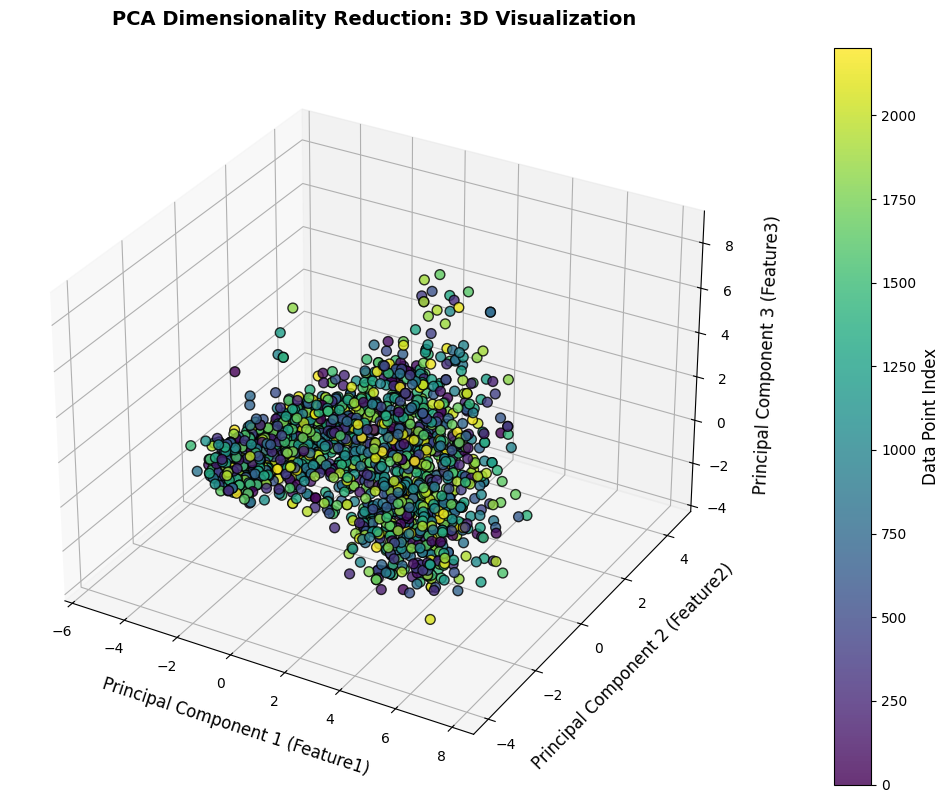

In [32]:
# Graph of PCA
from mpl_toolkits.mplot3d import Axes3D

x = pca_data["Feature1"]
y = pca_data["Feature2"]
z = pca_data["Feature3"]

print(f"The dataset after dimensionality reduction :")

# Add a color scale for clarity (optional: you can categorize points if needed)
colors = sns.color_palette("viridis", n_colors=len(pca_data))

# Start the plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with enhancements
scatter = ax.scatter(
    x, y, z,
    c=range(len(pca_data)),  # Add a color scale
    cmap='viridis',  # Colormap for the scatter plot
    s=50,  # Marker size
    edgecolor='k',  # Black edge for better marker visibility
    alpha=0.8  # Transparency for overlapping points
)

# Add a color bar to indicate point order
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Data Point Index', fontsize=12)

# Set axis labels
ax.set_xlabel('Principal Component 1 (Feature1)', fontsize=12, labelpad=10)
ax.set_ylabel('Principal Component 2 (Feature2)', fontsize=12, labelpad=10)
ax.set_zlabel('Principal Component 3 (Feature3)', fontsize=12, labelpad=10)

# Add a title
ax.set_title('PCA Dimensionality Reduction: 3D Visualization', fontsize=14, fontweight='bold', pad=20)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Segmentation
Determining the optimam number of clusters using Elbow method 

Determining the optimam number of clusters using Elbow method :


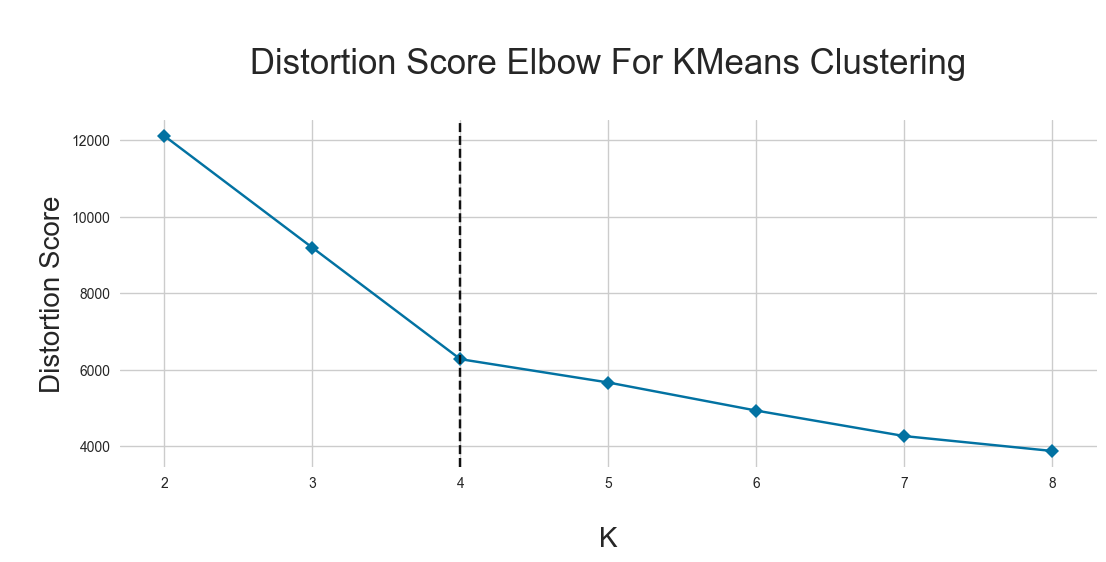

In [33]:
# Segmentation
# importing KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

print("Determining the optimam number of clusters using Elbow method :")
_, axes = plt.subplots(figsize=(20,8))

elbow = KElbowVisualizer(KMeans(), k=8, timings=False, locate_elbow=True, size=(1260,450))
elbow.fit(pca_data)

axes.set_title("\nDistortion Score Elbow For KMeans Clustering\n",fontsize=25)
axes.set_xlabel("\nK",fontsize=20)
axes.set_ylabel("\nDistortion Score",fontsize=20)

# Import the seaborn library
import seaborn as sns  # This line imports seaborn and assigns it to the alias 'sns'

sns.despine(left=True, bottom=True) # To Enhance the plot
plt.show()

#### From Dstortion Score Elbow for KMeans clustering graph that **K=4 is the optimal number of clusters**, So we will perform KMeans using K=4

In [34]:
# Perform K-means clustering Using K = 4
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(scaled_df)

# Create a new DataFrame
clustered_df = pd.DataFrame(scaled_df, columns=["Feature1", "Feature2", "Feature3"])  # Convert scaled_df to DataFrame
clustered_df['Cluster'] = clusters.labels_

# Display the clustered data
clustered_df.head(10)

,Feature1,Feature2,Feature3,Cluster
0,3.806861,-0.090608,-0.314517,2
1,-2.362278,0.271304,-0.192272,0
2,1.699520,0.124125,-1.072437,2
3,-2.623660,-1.430102,-0.062054,0
4,-0.423949,-0.110111,-0.673665,0
5,0.755279,1.322187,-0.387226,3
6,0.598611,1.310438,-0.776821,3
7,-2.389405,-0.991332,0.145698,0
8,-2.651627,-1.520924,1.429335,0
9,-4.666073,0.541652,1.847431,0


#### Adding the 'Cluster' Coloumn to the orignal dataframe 'df_org'.

In [35]:
#Adding the Clusters Coloumn to the orignal dataframe 'df_org'.
df_org["Cluster"]= clusters.labels_
df_org.head(5)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Family_Size,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow,Cluster
0,5524,1957,58138.0,0,0,58.0,635,88,546,172,...,1,True,False,False,False,False,False,True,False,2
1,2174,1954,46344.0,1,1,38.0,11,1,6,2,...,3,True,False,False,False,False,False,True,False,0
2,4141,1965,71613.0,0,0,26.0,426,49,127,111,...,2,True,False,False,False,False,True,False,False,2
3,6182,1984,26646.0,1,0,26.0,11,4,20,10,...,3,True,False,False,False,False,True,False,False,0
4,5324,1981,58293.0,1,0,94.0,173,43,118,46,...,3,False,False,False,True,False,True,False,False,0


#### Visualizing in 3D the clusters

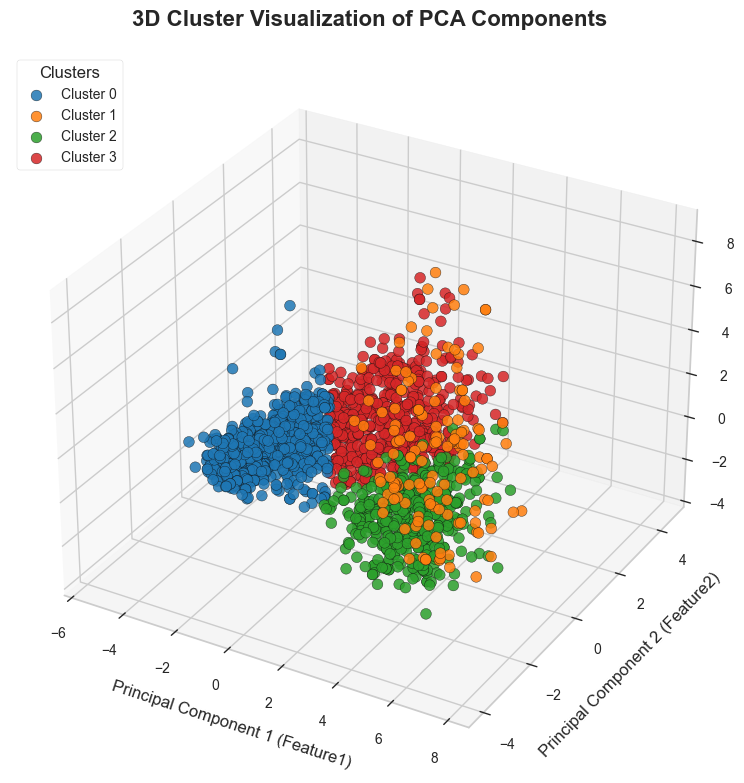

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Extract X, Y, Z, and Cluster labels
x = clustered_df["Feature1"]
y = clustered_df["Feature2"]
z = clustered_df["Feature3"]
clusters = clustered_df["Cluster"]

# Define a professional and consistent color palette
palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Subtle, professional blue, orange, green, red

# Create the 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Loop through each cluster and plot points with the defined color palette
for i in range(clusters.nunique()):  # Dynamically adjust for the number of clusters
    ax.scatter(
        x[clusters == i], 
        y[clusters == i], 
        z[clusters == i], 
        color=palette[i], 
        label=f'Cluster {i}', 
        s=60,  # Marker size
        edgecolor='k',  # Black edge for better marker definition
        alpha=0.85  # Transparency for overlapping points
    )

# Set axis labels with business-like design
ax.set_xlabel('Principal Component 1 (Feature1)', fontsize=12, labelpad=12)
ax.set_ylabel('Principal Component 2 (Feature2)', fontsize=12, labelpad=12)
ax.set_zlabel('Principal Component 3 (Feature3)', fontsize=12, labelpad=12)

# Add a descriptive title
ax.set_title('3D Cluster Visualization of PCA Components', fontsize=16, fontweight='bold', pad=20)

# Add a legend to identify clusters
ax.legend(title='Clusters', fontsize=10, title_fontsize=12, loc='upper left', frameon=True, framealpha=0.9)

# Add gridlines for perspective
ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout for a clean look
plt.tight_layout()

# Show the plot
plt.show()


#### Showing the DOMINANT VARIABLE in each Feature

In [37]:
#
pca_components = pd.DataFrame(pca.components_, columns=df_scaled.columns, index=["Feature1", "Feature2", "coFeature3"])
print("Loadings of the original variables in the principal components:")
print(pca_components)

Loadings of the original variables in the principal components:
            Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
Feature1     -0.061028  0.337153 -0.249663 -0.051058  0.001643  0.301645   
Feature2     -0.348957  0.082641 -0.095302  0.537329  0.041634  0.152309   
coFeature3    0.027708 -0.016785  0.080530  0.002172 -0.104192  0.198881   

            MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
Feature1     0.259129         0.311767         0.269264          0.263323   
Feature2    -0.097395        -0.132690        -0.106197         -0.089095   
coFeature3  -0.206153        -0.058247        -0.204820         -0.172954   

            ...  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Feature1    ...             0.319411           0.281001          -0.243375   
Feature2    ...             0.014470           0.204855           0.157815   
coFeature3  ...            -0.010579          -0.086774           0.214997   

         

In [38]:
# Identify dominant variables by component
dominant_features = pca_components.apply(lambda x: x.abs().nlargest(3).index, axis=1)
print("Most influential variables by component:")
print(dominant_features)

Most influential variables by component:
Feature1      Index(['Income', 'NumCatalogPurchases', 'MntMe...
Feature2      Index(['Teenhome', 'NumDealsPurchases', 'NumWe...
coFeature3    Index(['AcceptedCmp4', 'Response', 'AcceptedCm...
dtype: object


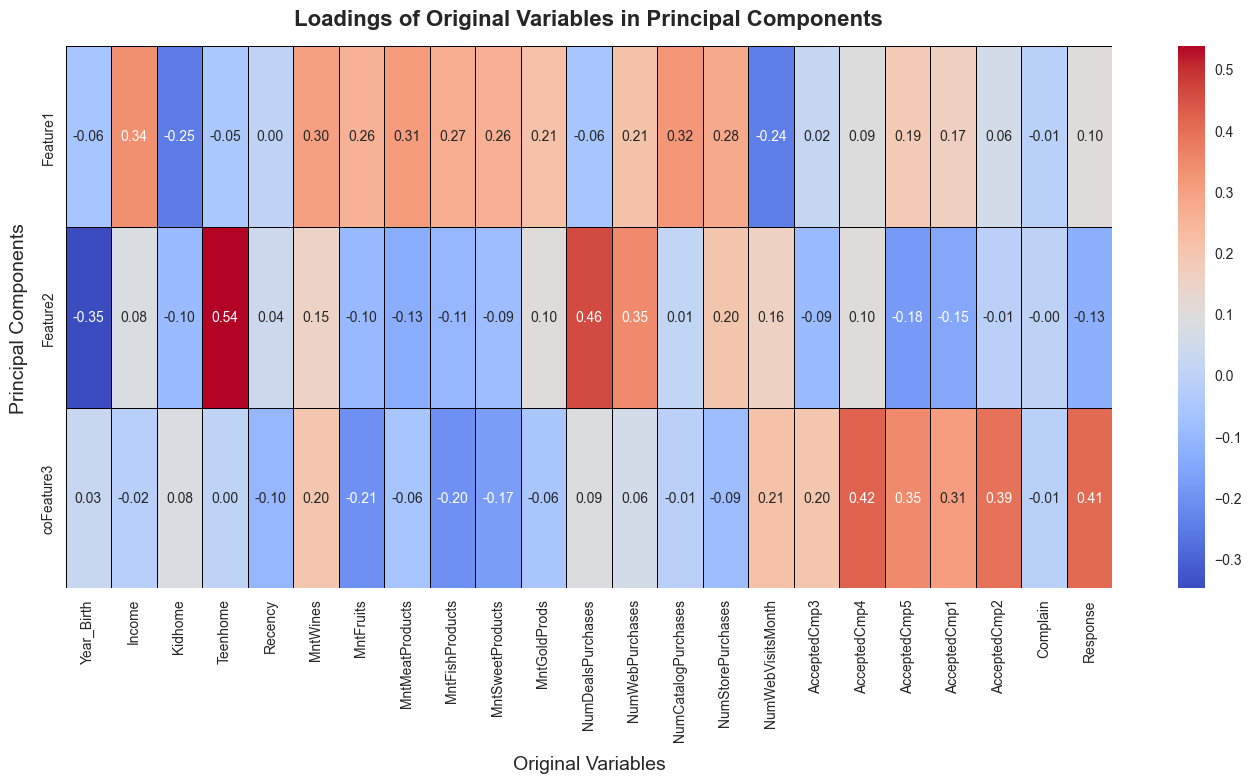

In [39]:
# Generate the heatmap for PCA component loadings
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Customize the heatmap
sns.heatmap(
    pca_components,
    annot=True,  # Display values on the heatmap
    fmt=".2f",  # Format numbers to 2 decimal places
    cmap="coolwarm",  # Use a diverging color palette for contrast
    cbar=True,  # Show a color bar
    linewidths=0.5,  # Add light gridlines for clarity
    linecolor='black',  # Gridline color
    annot_kws={"fontsize": 10},  # Annotation font size
)

# Add a descriptive title
plt.title("Loadings of Original Variables in Principal Components", fontsize=16, fontweight='bold', pad=15)

# Add axis labels
plt.xlabel("Original Variables", fontsize=14, labelpad=10)
plt.ylabel("Principal Components", fontsize=14, labelpad=10)

# Improve layout for a clean presentation
plt.tight_layout()

# Display the heatmap
plt.show()


### Clusters Analysis

In [40]:
# Display the number of data points in each cluster
cluster_counts = clustered_df['Cluster'].value_counts()
print("Number of data points in each cluster:")
print(cluster_counts)
print("\n")

# Calculate mean for each cluster
print("Mean for each feature for each cluster:")
cluster_summary = clustered_df.groupby('Cluster').mean()  
print(cluster_summary)
print("\n")

# Calculate standard deviation for each feature in each cluster
print("Standard deviation of features for each cluster:")
cluster_std = clustered_df.groupby('Cluster').std()
print(cluster_std)
print("\n")

Number of data points in each cluster:
Cluster
0    999
3    581
2    479
1    142
Name: count, dtype: int64


Mean for each feature for each cluster:
         Feature1  Feature2  Feature3
Cluster                              
0       -2.328964 -0.580183  0.049071
1        4.659867 -1.361195  3.118377
2        3.075920 -0.476185 -1.180594
3        0.329722  1.722865  0.126803


Standard deviation of features for each cluster:
         Feature1  Feature2  Feature3
Cluster                              
0        0.666929  0.940534  0.630738
1        1.470403  1.246252  2.080827
2        1.082562  1.050948  0.894728
3        1.114798  0.910772  1.135093




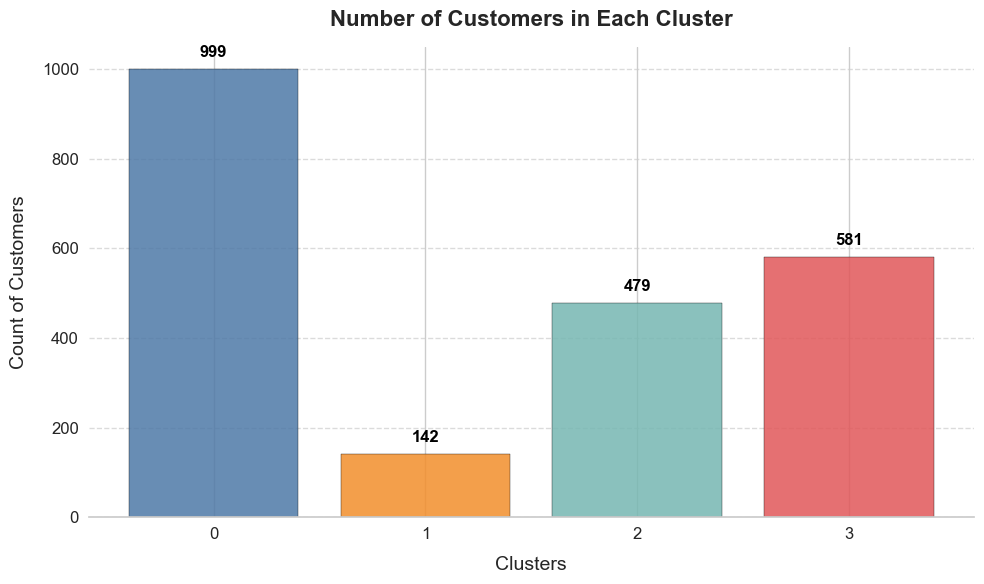

In [41]:
# Show The Number of Customers in Each Cluster

# Display the number of customers in each cluster
cluster_counts = clustered_df["Cluster"].value_counts().sort_index()
cluster_labels = cluster_counts.index   # Define the X-Axis
cluster_values = cluster_counts.values  # Count in each Cluster

# Define a consistent, professional color palette
colors = ['#4E79A7', '#F28E2B', '#76B7B2', '#E15759']  # Professional shades of blue, orange, green, red

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_labels, cluster_values, color=colors, edgecolor='black', alpha=0.85)

# Add chart title and axis labels
plt.title("Number of Customers in Each Cluster", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Clusters", fontsize=14, labelpad=10)
plt.ylabel("Count of Customers", fontsize=14, labelpad=10)

# Annotate the bars with data values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 20,  # Position above the bar
        f'{int(height)}',                               # Format value as integer
        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold'
    )

# Customize gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(cluster_labels, fontsize=12)  # Customize x-axis labels
plt.yticks(fontsize=12)                  # Customize y-axis labels

# Remove unnecessary borders for a cleaner look
sns.despine(left=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the chart
plt.show()


#### Clusters analysis based on Education & Marital Status

In [42]:
# for Under Standing the Clusters and who is in each cluster

# Define the categorical columns explicitly
categorical_columns = [
       'Education_Bachelor',
       'Education_Basic', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Widow'
]

# Remove duplicates from df_org columns (if any)
df_org = df_org.loc[:, ~df_org.columns.duplicated()]

# Ensure the specified categorical columns exist in the DataFrame
valid_categorical_columns = [col for col in categorical_columns if col in df_org.columns]

# Group data by clusters
cluster_groups = df_org.groupby('Cluster')

# Profile categorical data for each cluster
categorical_profiles = {}
for cluster, group in cluster_groups:
    cluster_profile = {}
    for col in valid_categorical_columns:
        # Ensure the column is in boolean format (True/False)
        if group[col].dtype == 'bool':
            # Calculate the percentage distribution for True and False values in the cluster
            value_counts = group[col].value_counts(normalize=True) * 100  # Normalize to percentage
            cluster_profile[col] = value_counts
    categorical_profiles[cluster] = cluster_profile

# Convert profiles to DataFrames for readability
cluster_summaries = {}
for cluster, profile in categorical_profiles.items():
    summary = pd.DataFrame(profile).fillna(0)  # Replace NaNs with 0 for missing categories
    cluster_summaries[cluster] = summary

# Print profiles for each cluster
for cluster, summary in cluster_summaries.items():
    print(f"Cluster {cluster} Profile:")
    print(summary.T)  # Transpose for better readability
    print("-" * 50)

Cluster 0 Profile:
                             False      True 
Education_Bachelor       51.251251  48.748749
Education_Basic          94.794795   5.205205
Education_Master         72.972973  27.027027
Education_PhD            80.980981  19.019019
Marital_Status_Divorced  90.390390   9.609610
Marital_Status_Married   35.535536  64.464464
Marital_Status_Single    76.676677  23.323323
Marital_Status_Widow     97.397397   2.602603
--------------------------------------------------
Cluster 1 Profile:
                              False      True 
Education_Bachelor        49.295775  50.704225
Education_Basic          100.000000   0.000000
Education_Master          75.352113  24.647887
Education_PhD             75.352113  24.647887
Marital_Status_Divorced   90.140845   9.859155
Marital_Status_Married    39.436620  60.563380
Marital_Status_Single     75.352113  24.647887
Marital_Status_Widow      95.070423   4.929577
--------------------------------------------------
Cluster 2 Profile:
    

### Interpretation of the above stats on clusters (in order to understand clusters more)

**Cluster 0: Married with higher education levels (Bachelor's degrees)**
*   Dominated by married individuals with a bachelor's degree.
* **Marketing strategies** should primarily target married individuals with bachelor's degrees as they represent the majority.

**Cluster 1: Married &  Singles with higher education levels (Bachelor's and Master's degrees)**
* A balanced distribution among married and single individuals with significant representation in master's and PhD education levels
* **Marketing strategies** Emphasizing premium or educational products in the marketing campain.

**Cluster 2: Married individuals with higher education (Bachelor's and Master's degrees)**
* Higher proportion of married individuals with bachelor's and master's degrees.


**Cluster 3: Single individuals with a higher concentration of Bachelor's degree holders, ollowed by PhD holders.**
* Dominated by single individuals with bachelor's degrees, followed by PhD holders.
* **Marketing strategies** Emphasizing premium or educational products in the marketing campain.

#### Visualizing Clusters Vs Education & Marital Status

In [ ]:
# Visualizing Clusters Vs Education & Marital Status

# Convert data to pivot for stacked bar chart
plot_pivot = plot_df.pivot(index='Category', columns='Cluster', values='True Percentage')

# Plot the stacked bar chart
plot_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='coolwarm',
    edgecolor='black',
    alpha=0.85
)

# Customize the chart
plt.title('Stacked Percentage Distribution by Category and Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('True Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize=12, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'plot_df' is not defined

#### Showing Distribution of Feature1 & Feature2 & Feature3 on each cluster of customers

/var/folders/ds/1c0j3hg92pgchkgv4lqsnjjh0000gn/T/ipykernel_68542/1378080578.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


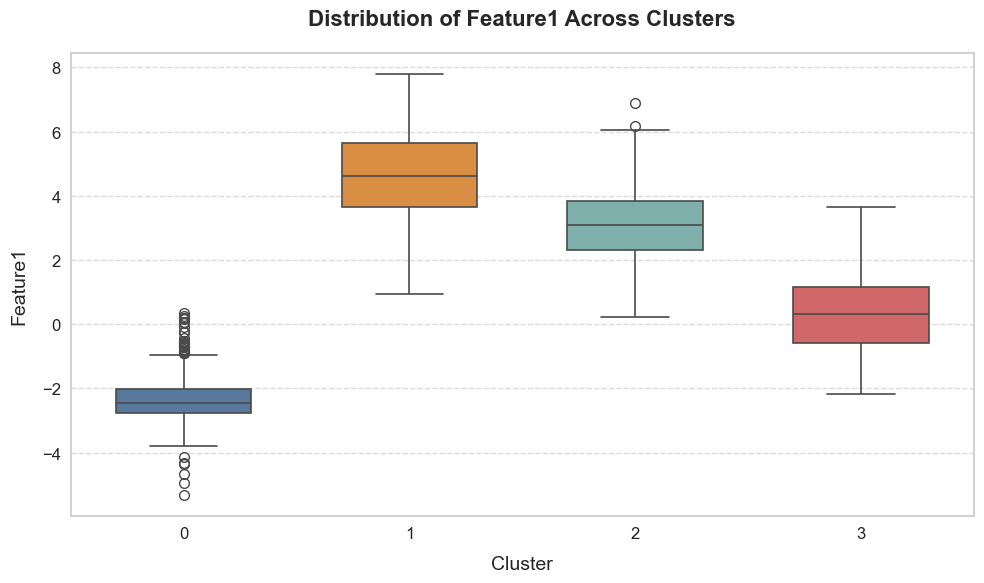

/var/folders/ds/1c0j3hg92pgchkgv4lqsnjjh0000gn/T/ipykernel_68542/1378080578.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


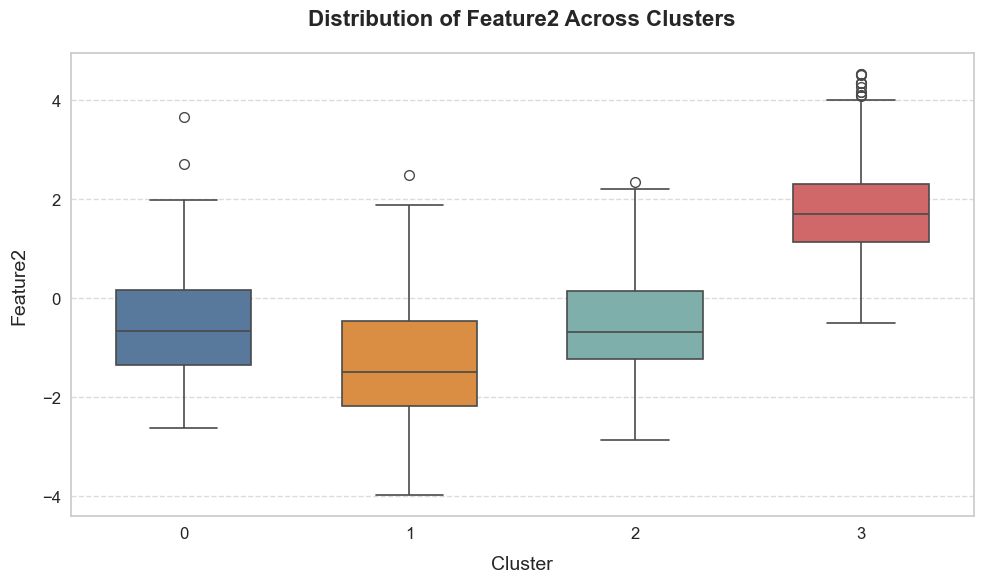

/var/folders/ds/1c0j3hg92pgchkgv4lqsnjjh0000gn/T/ipykernel_68542/1378080578.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


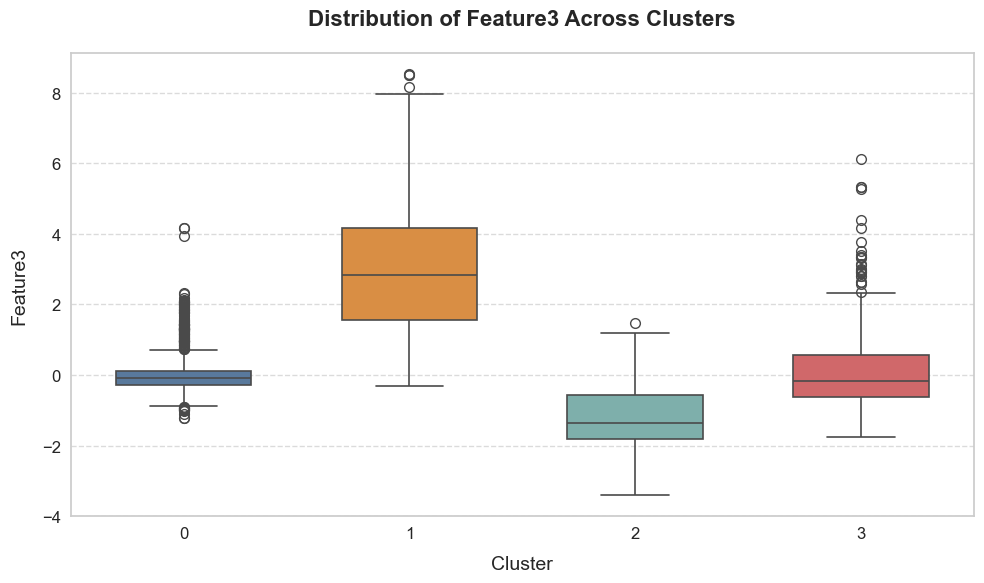

In [ ]:
# Showing Distribution of Feature1 & Feature2 & Feature3 on each cluster of customers

# Improved visualization for distribution of Feature1, Feature2, and Feature3 across clusters
features = ["Feature1", "Feature2", "Feature3"]  # Features to visualize
colors = ['#4E79A7', '#F28E2B', '#76B7B2', '#E15759']  # Business-friendly color palette

for feature in features:
    plt.figure(figsize=(10, 6))  # Set the figure size
    
    # Create a boxplot for the feature grouped by clusters
    sns.boxplot(
        x='Cluster', 
        y=feature, 
        data=clustered_df, 
        palette=colors, 
        width=0.6,  # Adjust the width of the boxes
        linewidth=1.2  # Set the border line width
    )
    
    # Customize the plot
    plt.title(f'Distribution of {feature} Across Clusters', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Cluster', fontsize=14, labelpad=10)
    plt.ylabel(feature, fontsize=14, labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add a grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Tighten the layout for a polished appearance
    plt.tight_layout()
    
    # Show the plot
    plt.show()


#### Insights from the above 3 graphs
##### Feature 1 Figure:
* Cluster 1 represents the most positive "Feature1" values and has the widest variability. It could be ideal for premium or high-value offerings.

##### Feature 2 Figure:
* Cluster 3 with high "Feature2" values and variability suggest it could represent a high-performing group or one with significant potential. Tailored strategies focusing on premium offerings or personalized approaches could be effective.
* Clusters 0 and 2 as stable segments: Standardized strategies could work effectively for these groups, with less need for highly specialized approaches.

##### Feature 3 Figure:
* Cluster 1 represents the most positive "Feature3" values and has the widest variability. It could be ideal for premium or high-value offerings.

#### Showing Total Number of Accepted Campains for each cluster

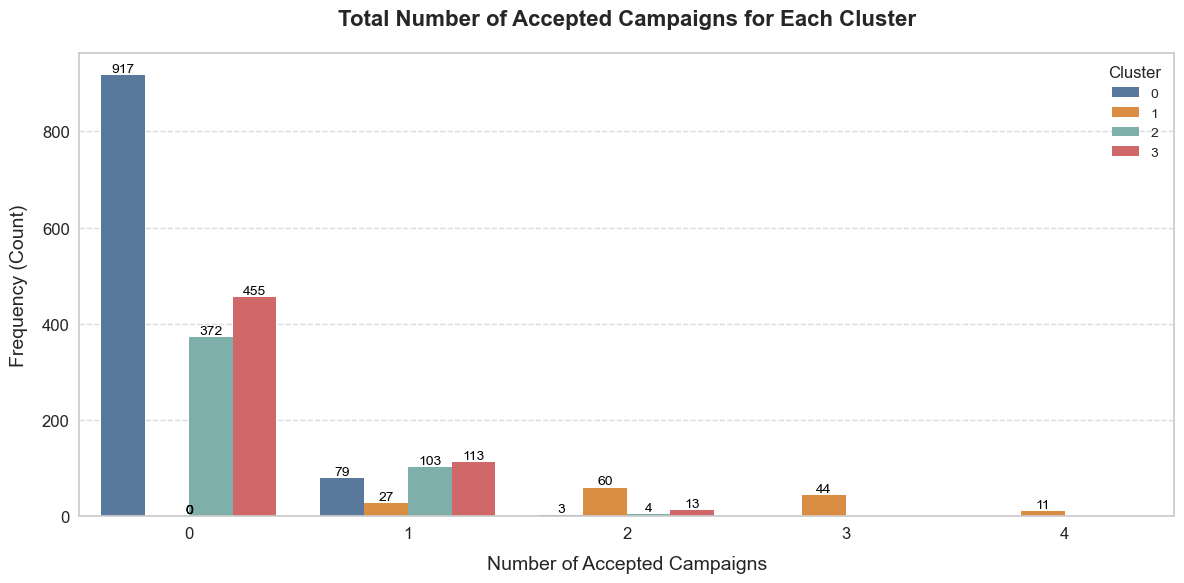

In [ ]:
# Optimized Visualization for Total Number of Accepted Campaigns per Cluster
plt.figure(figsize=(12, 6))  # Set figure size

# Create the countplot with Seaborn for cleaner aesthetics
pl = sns.countplot(
    x='No of Accepted Campains', 
    hue='Cluster', 
    data=df_org, 
    palette=['#4E79A7', '#F28E2B', '#76B7B2', '#E15759']  # Business-friendly palette
)

# Set the title and axis labels with consistent styling
pl.set_title("Total Number of Accepted Campaigns for Each Cluster", fontsize=16, fontweight='bold', pad=20)
pl.set_xlabel("Number of Accepted Campaigns", fontsize=14, labelpad=10)
pl.set_ylabel("Frequency (Count)", fontsize=14, labelpad=10)
pl.tick_params(axis='both', labelsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the count values
for p in pl.patches:
    height = p.get_height()  # Get the height of the bar
    x_position = p.get_x() + p.get_width() / 2  # Calculate the center of the bar
    # Add the text label
    pl.text(
        x_position, 
        height + 0.1,  # Position slightly above the bar
        f'{int(height)}', 
        ha="center", va="bottom", fontsize=10, color='black'
    )

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


#### Insights from the graph
##### **Cluster 0** has the highest number of individuals with "0 Accepted Campaigns," suggesting this group is the least responsive.
##### **Cluster 1** is the most engaged group, with the highest representation in 2, 3, and 4 accepted campaigns.
##### **Clusters 2** have high counts in "0 Accepted Campaigns," indicating disengagement.
##### **Clusters 3** have high counts in "0 Accepted Campaigns," indicating disengagement.
##### **Cluster 3** has the highest number of individuals accepting exactly 1 campaign, indicating a small but significant level of engagement.


#### Plotting Family Sizes in each cluster

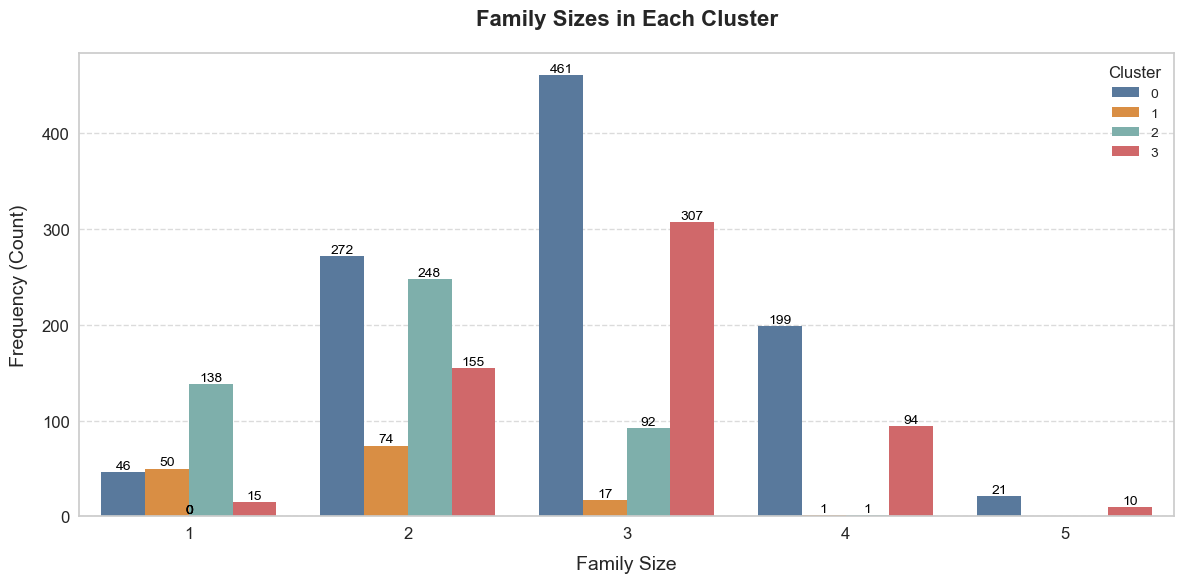

In [ ]:
# Optimized Visualization for Family Sizes in Each Cluster
plt.figure(figsize=(12, 6))  # Set a larger figure size for better readability

# Create the countplot with a professional color palette
pl = sns.countplot(
    x='Family_Size', 
    hue='Cluster', 
    data=df_org, 
    palette=['#4E79A7', '#F28E2B', '#76B7B2', '#E15759']  # Business-friendly palette
)

# Set the title and axis labels with enhanced styling
pl.set_title("Family Sizes in Each Cluster", fontsize=16, fontweight='bold', pad=20)
pl.set_xlabel("Family Size", fontsize=14, labelpad=10)
pl.set_ylabel("Frequency (Count)", fontsize=14, labelpad=10)
pl.tick_params(axis='both', labelsize=12)

# Add gridlines for easier interpretation
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the count values
for p in pl.patches:
    height = p.get_height()  # Get the bar height
    x_position = p.get_x() + p.get_width() / 2  # Calculate the center of the bar
    # Add the annotation with proper styling
    pl.text(
        x_position, 
        height + 0.1,  # Position above the bar
        f'{int(height)}',  # The count value
        ha="center", va="bottom", fontsize=10, color='black'
    )

# Adjust the legend styling for clarity
plt.legend(
    title='Cluster', 
    title_fontsize=12, 
    fontsize=10, 
    loc='upper right', 
    frameon=False
)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


#### Insights from the graph:
* **Cluster 0** leads in meduim family sizes (3 members) and small family size of (1 to 2) members (Small to Meduim Families)
*             Consider offering bundles tailored to 2–3-member families.
* **Cluster 1** most in small family size of (1 to 2) members (Small Families)
*             Target single individuals with individual-focused offerings, such as single-serve products
* **Cluster 2** leads in small family size of (1 to 2) members (Small Families)
*             Target single individuals with individual-focused offerings, such as single-serve products
* **Cluster 3** leads in large family sizes (4–5 members) and meduim family size of 3 members (Meduim to Larg Families)
*             Tailor campaigns for medium and large families, such as family bundles, home appliances, or family-oriented services.

#### Using Seaborn (sns) to generate visualizations for the relationships between a set of personal features ('Income' , 'Family_Size', 'Education', ...etc.) and the amount spent by a customer.

##### 1. using Seaborn (sns) to generate visualizations for the relationships between 'Income' and the amount spent by a customer.

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/var/folders/ds/1c0j3hg92pgchkgv4lqsnjjh0000gn/T/ipykernel_68542/1566924996.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


<Figure size 1000x600 with 0 Axes>

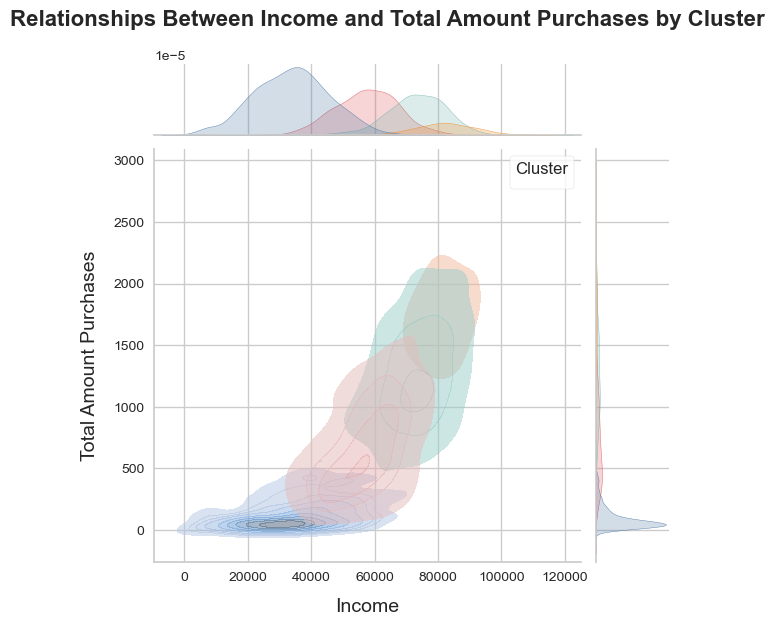

In [ ]:
# Optimized KDE Plot for Income vs. Total Amount Purchases
plt.figure(figsize=(10, 6))  # Set figure size for better readability

# Create a KDE plot using Seaborn's jointplot
joint_plot = sns.jointplot(
    x='Income', 
    y='Total Amount Purchases', 
    hue='Cluster', 
    data=df_org, 
    kind="kde", 
    palette=['#4E79A7', '#F28E2B', '#76B7B2', '#E15759'],  # Business-friendly colors
    fill=True,  # Fill the density areas for better visual effect
    alpha=0.5,  # Transparency for overlapping areas
    linewidth=1  # Line thickness for KDE contours
)

# Add titles and labels with enhanced styling
joint_plot.fig.suptitle(
    'Relationships Between Income and Total Amount Purchases by Cluster', 
    fontsize=16, fontweight='bold', y=1.02
)
joint_plot.set_axis_labels(
    'Income', 
    'Total Amount Purchases', 
    fontsize=14, 
    labelpad=10
)

# Adjust title and spacing for better layout
joint_plot.fig.subplots_adjust(top=0.93, hspace=0.2)

# Add a legend with customization
plt.legend(
    title='Cluster', 
    title_fontsize=12, 
    fontsize=10, 
    loc='upper right', 
    frameon=True
)

# Display the plot
plt.show()

#### Insights from the graph
 **Cluster 0 (Red):**
*   Concentrated in the low-income range (up to $40,000).
*   Total purchases are minimal, mostly below 500.
*   Represents a low-income, low-spending group.
**Engage Cluster 0 with budget-friendly strategies**

**Cluster 1 (Blue):**
*   Located in the middle-income range ($50,000–$80,000).
*   Total purchases range between 500 and 1,500, indicating moderate to high spending.
*   Represents a mid-income, high-spending group.

 **Cluster 2 (Green):**
*   Distributed in the upper-middle-income range ($70,000–$100,000).
*   Total purchases range from 500 to 2,000, suggesting higher spending.
*   Represents a mid-income, high-spending group.
**Target Cluster 2 for premium offerings**

**Cluster 3 (Pink):**
*   Located in the low-mid-income range ($50,000–$90,000).
*   Total purchases are distributed between 500 and 1,500, indicating moderate spending.


### **Conclusion**
#### Cluster Profiles and Suggested Marketing Strategies

##### **Cluster 0 - Profile: Traditional Married Budget-Conscious Families**
* Marital Status: Predominantly married.
* Education: Bachelor’s or basic education.
* Income: Low-income bracket.
* Spending: Low-spending behavior.

**Suggested Marketing Strategy for Cluster 0:** 
* Product Bundling: Create family-friendly bundles that offer discounts on grocery items, home essentials, or child-centric products. For instance, “Back-to-School Kits” or “Family Movie Night Packages.”
* Community Engagement: Organize family-oriented community events, such as free workshops or kids’ activity days, where your brand can subtly integrate its products.
* Referral Incentives: Offer discounts or cash-back rewards for referring other family members or friends to your brand.
* Digital Accessibility: Introduce user-friendly apps or platforms with budgeting tools, family planners, or discounts tailored to families’ needs.
* Localized Promotions: Work with local stores or community centers to provide hyper-localized offers that appeal to traditional family setups.


##### **Cluster 1 - Profile: Educated Singles & Widowed Professionals**
* Marital Status: Diverse mix of singles, married, and widowed individuals.
* Education: Higher education levels (master’s and PhD).
* Income: Moderate-income level.
* Spending: Mid-tier spending group.

**Suggested Marketing Strategy for Cluster 1:** 
* Professional Development: Offer packages focused on certifications, skill upgrades, and networking events. Partner with platforms like LinkedIn or online learning hubs for joint promotions.
* Personalized Experiences: Introduce customizable products or services, such as tailored skincare routines or custom-designed office setups.
* Luxury Sampling: Provide free samples or trials of premium products, enticing them to convert to long-term customers.
* Upsell Wellness Programs: Highlight wellness retreats, mindfulness apps, or self-care subscriptions targeting personal growth.
* Cross-Collaborations: Collaborate with professional organizations or alumni networks for exclusive offers targeting professionals looking to upskill.

##### **Cluster 2 - Profile: Educated Married High Earners**
* Marital Status: Predominantly married professionals.
* Education: Bachelor’s and master’s degrees.
* Income: High-income bracket.
* Spending: Consistently high spenders.

Suggested Marketing Strategy for Cluster 2:
* Exclusive Memberships: Offer VIP membership programs with added benefits, such as free delivery, premium packaging, or exclusive discounts on luxury products.
* Family-Centric Luxury: Highlight high-quality, long-lasting family products, such as educational tech devices for children, luxury travel packages, or eco-friendly home appliances.
* Event Sponsorships: Sponsor family-friendly upscale events, such as wine tastings, tech fairs, or educational workshops, to create a high-value association with your brand.
* Premium Subscription Services: Launch subscription boxes featuring curated items like artisanal goods, gourmet snacks, or home décor, delivered monthly.
* Smart Home Integration: Collaborate with smart home brands to introduce exclusive deals on connected devices that align with their modern lifestyle.


##### **Cluster 3 - Profile: Urban Educated Singles**
* Marital Status: Mostly single individuals.
* Education: Bachelor’s and PhD holders dominate this cluster.
* Income: Middle-to-upper-middle income.
* Spending: Moderate to high spenders.

**Suggested Marketing Strategy for Cluster 3:** 
* Experience Marketing: Promote experiential products or services, such as VR gaming setups, co-working spaces, or exclusive access to events like concerts or exhibitions.
* Digital Exclusivity: Use digital marketing strategies like flash sales, early-access offers, or influencer-led campaigns to align with their fast-paced, tech-savvy lifestyle.
* Subscription Models: Provide subscriptions for lifestyle services, such as premium gym memberships, food delivery plans, or streaming platforms.
* Sustainability Appeal: Highlight eco-friendly products, such as reusable travel kits or sustainable fashion, to cater to their likely environmental awareness.
Gadget and Tech Enthusiasm: Market premium gadgets (headphones, smart devices) with a focus on sleek design and cutting-edge technology.

##### **Overall**
1. Omnichannel Presence: Use digital platforms for Cluster 3 while maintaining traditional marketing approaches for Cluster 0. Personalized campaigns for Clusters 1 and 2 could perform well in hybrid models combining digital and offline channels.
2. Product Differentiation: Offer clearly segmented products to address the unique needs of each cluster, ensuring that overlaps between segments (e.g., Cluster 1 and Cluster 3) are minimal.
3. Loyalty Ecosystem: Develop a unified loyalty program with tiered benefits for each cluster. For example, Cluster 0 can earn points on value purchases, while Cluster 2 gets concierge services.
4. Data-Driven Customization: Use insights from spending behaviors and preferences to drive real-time personalized offers across e-commerce platforms, boosting conversion rates.
5. Collaborative Opportunities: Partner with external organizations such as universities, family brands, or tech companies to create collaborative campaigns that expand the reach across clusters.
